Data Preparation


The dataset for training the model is from "Sentiment140", a dataset originated from Stanford University. A dataset of tweets labelled either positive or negative.
More info on the dataset can be found from the below link.
http://help.sentiment140.com/for-students/<br><br>
The dataset can be downloaded from the below link.<br>
http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip

By looking at the description of the dataset from the link, the information on each field can be found.

0 - the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)<br>
1 - the id of the tweet (2087)<br>
2 - the date of the tweet (Sat May 16 23:58:44 UTC 2009)<br>
3 - the query (lyx). If there is no query, then this value is NO_QUERY.<br>
4 - the user that tweeted (robotickilldozr)<br>
5 - the text of the tweet (Lyx is cool)

## First look at the data

In [22]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

First, columns names have been assigned to each column.

In [23]:
cols = ['sentiment','id','date','query_string','user','text']

In [24]:
df = pd.read_csv("./trainingandtestdata/training.1600000.processed.noemoticon.csv",header=None, names=cols, encoding='latin-1')

In [25]:
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   sentiment     1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   date          1600000 non-null  object
 3   query_string  1600000 non-null  object
 4   user          1600000 non-null  object
 5   text          1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [27]:
df.sentiment.value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

Dataset has 1.6million entries, with no null entries, and importantly for the "sentiment" column,
even though the dataset description mentioned neutral class, the training set has no neutral class.
50% of the data is with negative label, and another 50% with positive label.
We can see there's no skewness on the class division.

In [28]:
df.query_string.value_counts()

NO_QUERY    1600000
Name: query_string, dtype: int64

In [29]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [30]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


I first started by dropping the columns that I don't need for the specific purpose of sentiment analysis.<br><br>
"id" column is unique ID for each tweet<br>
"date" column is for date info for the tweet<br>
"query_string" column indicates whether the tweet has been collected with any particular query keyword,
but for this column, 100% of the entries are with value "NO_QUERY"<br>
"user" column is the twitter handle name for the user who tweeted<br><br>
I decided to drop above four columns.

In [31]:
df[df.sentiment == 0].head(10)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [32]:
df[df.sentiment == 4].head(10)

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
800005,4,@ProductOfFear You can tell him that I just bu...
800006,4,@r_keith_hill Thans for your response. Ihad al...
800007,4,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,4,"@tommcfly ah, congrats mr fletcher for finally..."
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...


By looking at some entries for each class, it seems like that all the negative class is from 0~799999th index,
and the positive class entries start from 800000 to the end of the dataset.

In [33]:
df[df.sentiment == 0].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            799990, 799991, 799992, 799993, 799994, 799995, 799996, 799997,
            799998, 799999],
           dtype='int64', length=800000)

In [34]:
df[df.sentiment == 4].index

Int64Index([ 800000,  800001,  800002,  800003,  800004,  800005,  800006,
             800007,  800008,  800009,
            ...
            1599990, 1599991, 1599992, 1599993, 1599994, 1599995, 1599996,
            1599997, 1599998, 1599999],
           dtype='int64', length=800000)

In order for the computation, I mapped the class value of 4(positive) to 1.

In [35]:
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})

In [36]:
df.sentiment.value_counts()

0    800000
1    800000
Name: sentiment, dtype: int64

# Data Preparation

As a way of sanity check, let's look at the length of the string in text column in each entry.

In [37]:
df['pre_clean_len'] = [len(t) for t in df.text]

## Data Dictionary - first draft

Below is the first draft of the data dictionary for the dataset, but as I go through preparation, this will need to be updated.

In [38]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}

pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


 I will also plot pre_clean_len with box plot, so that I can see the overall distribution of length of strings in each entry.

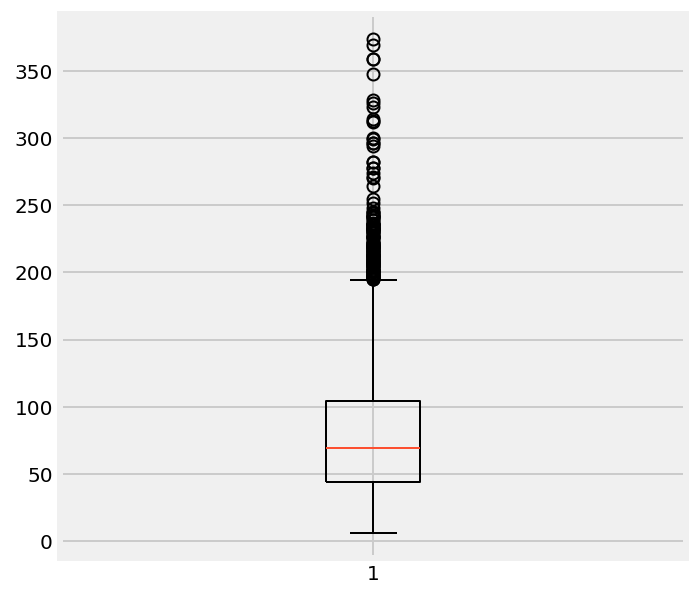

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

This looks a bit strange, since the twitter's character limit is 140. But from the above box plot, some of the tweets are way more than 140 chracters long.

In [40]:
df[df.pre_clean_len > 140].head(10)

,sentiment,text,pre_clean_len
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141


## Data Preparation 1: HTML decoding

It looks like HTML encoding has not been converted to text, and ended up in text field as '&amp','&quot',etc.<br>
Decoding HTML to general text will be my first step of data preparation.
I will use BeautifulSoup for this.

In [41]:
df.text[279]

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [49]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], "html.parser")
print( example1.get_text())

Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


## Data Preparation 2: @mention

The second part of the preparation is dealing with @mention.<br>
Even though @mention carries a certain information (which another user that the tweet mentioned),
this information doesn't add value to build sentiment analysis model.

In [50]:
df.text[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [51]:
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

## Data Preparation 3: URL links

The third part of the cleaning is dealing with URL links, same with @mention,
even though it carries some information, for sentiment analysis purpose,
this can be ignored.

In [52]:
df.text[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [53]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

## Data Preparation 4: UTF-8 BOM (Byte Order Mark)

In [54]:
df.text[226]

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

By looking at the above entry, I can see strange patterns of characters "\xef\xbf\xbd".
After some researching, I found that these are UTF-8 BOM.<br>
"The UTF-8 BOM is a sequence of bytes (EF BB BF) that allows the reader to identify a file as being encoded in UTF-8."

By decoding text with 'utf-8-sig', this BOM will be replaced with unicode unrecognizable special characters, then I can process this as "?"

In [56]:
testing = df.text[226]
testing

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [57]:
testing.replace(u"\ufffd", "?")

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

## Data Preparation 5: hashtag / numbers

Sometimes the text used with a hashtag can provide useful information about the tweet. It might be a bit risky to get rid of all the text together with the hashtag.<br>
So I decided to leave the text intact and just remove the '#'. I will do this in the process of cleaning all the non-letter characters including numbers.

In [58]:
df.text[175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [59]:
re.sub("[^a-zA-Z]", " ", df.text[175])

' machineplay I m so sorry you re having to go through this  Again    therapyfail'

# Defining data cleaning function

With above five data cleaning task, I will first define data cleaning function, and then will be applied to the whole dataset. Tokenization, stemming/lemmatization, stop words will be dealt with later stage when creating matrix with either count vectorizer or Tfidf vectorizer.

In [61]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [66]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, "html.parser")
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [67]:
testing = df.text[:100]

In [68]:
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

C:\Users\bthomask\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [69]:
test_result

['awww that s a bummer you shoulda got david carr of third day to do it d',
 'is upset that he can t update his facebook by texting it and might cry as a result school today also blah',
 'i dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it s not behaving at all i m mad why am i here because i can t see you all over there',
 'not the whole crew',
 'need a hug',
 'hey long time no see yes rains a bit only a bit lol i m fine thanks how s you',
 'k nope they didn t have it',
 'que me muera',
 'spring break in plain city it s snowing',
 'i just re pierced my ears',
 'i couldn t bear to watch it and i thought the ua loss was embarrassing',
 'it it counts idk why i did either you never talk to me anymore',
 'i would ve been the first but i didn t have a gun not really though zac snyder s just a doucheclown',
 'i wish i got to watch it with you i miss you and how was the premiere',
 'hollis death scene will hurt

In [70]:
nums = [0,400000,800000,1200000,1600000]

In [73]:
%%time
print( "Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%10000 == 0 ):
        print( "Tweets %d of %d has been processed" % ( i+1, nums[1] ) )                                                                   
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 10000 of 400000 has been processed
Tweets 20000 of 400000 has been processed
Tweets 30000 of 400000 has been processed
Tweets 40000 of 400000 has been processed
Tweets 50000 of 400000 has been processed
Tweets 60000 of 400000 has been processed
Tweets 70000 of 400000 has been processed
Tweets 80000 of 400000 has been processed
Tweets 90000 of 400000 has been processed
Tweets 100000 of 400000 has been processed
Tweets 110000 of 400000 has been processed
Tweets 120000 of 400000 has been processed
Tweets 130000 of 400000 has been processed
Tweets 140000 of 400000 has been processed
Tweets 150000 of 400000 has been processed
Tweets 160000 of 400000 has been processed
Tweets 170000 of 400000 has been processed
Tweets 180000 of 400000 has been processed
Tweets 190000 of 400000 has been processed
Tweets 200000 of 400000 has been processed
Tweets 210000 of 400000 has been processed
Tweets 220000 of 400000 has been processed
Tweets 230000 of 400000 has

In [74]:
len(clean_tweet_texts)

400000

In [75]:
%%time
print( "Cleaning and parsing the tweets...\n")
for i in range(nums[1],nums[2]):
    if( (i+1)%10000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums[2] ))                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 410000 of 800000 has been processed
Tweets 420000 of 800000 has been processed
Tweets 430000 of 800000 has been processed
Tweets 440000 of 800000 has been processed
Tweets 450000 of 800000 has been processed
Tweets 460000 of 800000 has been processed
Tweets 470000 of 800000 has been processed
Tweets 480000 of 800000 has been processed
Tweets 490000 of 800000 has been processed
Tweets 500000 of 800000 has been processed
Tweets 510000 of 800000 has been processed
Tweets 520000 of 800000 has been processed
Tweets 530000 of 800000 has been processed
Tweets 540000 of 800000 has been processed
Tweets 550000 of 800000 has been processed
Tweets 560000 of 800000 has been processed
Tweets 570000 of 800000 has been processed
Tweets 580000 of 800000 has been processed
Tweets 590000 of 800000 has been processed
Tweets 600000 of 800000 has been processed
Tweets 610000 of 800000 has been processed
Tweets 620000 of 800000 has been processed
Tweets 630000 of 8

In [76]:
len(clean_tweet_texts)

800000

In [ ]:
%%time
print ("Cleaning and parsing the tweets...\n")
for i in xrange(nums[2],nums[3]):
    if( (i+1)%10000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums[3] ))                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

: 

In [ ]:
len(clean_tweet_texts)

: 

In [ ]:
%%time
print ("Cleaning and parsing the tweets...\n")
for i in range(nums[3],nums[4]):
    if( (i+1)%10000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums[4] )   )                                                                 
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

: 

In [ ]:
len(clean_tweet_texts)

: 

## Saving cleaned data as csv

In [ ]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.head()

: 

In [ ]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')

: 

In [ ]:
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

: 

# Project Aim

Project aim is to build a sentiment analysis model with given training dataset, so that it can be applied to tweets gathered through twitter api.
Once the model is built, tweets from different cities will be gathered, and sentimenet analysis will be performed on gathered data to analyse positivity/negativity in different cities in UK, and will be compared with each other.

Feature engineering:<br>
    maximum features - experiment with maximum number of features to see how the results differ. <br>
    n-grams - experiment with different n-grams (unigram, unigram+bigram, bigram only, etc.) <br>
    stemming/lemmatizing - test both with and without stemming or lemmatization<br>
    vectorizing - test different vectorizing models (count vectorizer, tfidf vectorizer, word2vec/doc2vec)<br>
    lexicon - test with and without lexicon use, think of good way to use lexicon feature with the model<br>
    

Models:<br>
    try different models with above features.<br>
    Logistic Regression, Random Forest, Naive Bayes,etc.<br>
    And also try simple neural network to compare the performance<br>

Risks:<br>
    By relying on training data's vocabularies, if the training data is not big enough,<br>
    it has a risk of performing not very well with new data,<br>
    in this case, new tweets which will be gathered through twitter api<br>

# Twitter API trial

For the application part, I am planning to retreive tweets using Twitter API,
so I gave it a try to see if it works as I expect.

In [77]:
import tweepy
import hidden
import sqlite3
from langdetect import detect

ModuleNotFoundError: No module named 'hidden'

keys and tokens are from the file I put in the same directory called "hidden"

In [ ]:
auth = tweepy.OAuthHandler(hidden.consumer_key, hidden.consumer_secret)
auth.set_access_token(hidden.token_key, hidden.token_secret)
api = tweepy.API(auth)

: 

In order to retrieve tweets from specific location, I need place_id.

In [ ]:
places = api.geo_search(query="London", granularity="city")

place_id_L = places[0].id
print('London id is: ',place_id_L)

: 

In [ ]:
places = api.geo_search(query="Brighton", granularity="city")

place_id_B = places[0].id
print('Brighton id is: ',place_id_B)

: 

In [ ]:
places = api.geo_search(query="Edinburgh", granularity="city")

place_id_E = places[0].id
print('Edinburgh id is: ',place_id_E)

: 

I tried if this place_id works OK.

In [ ]:
maxitems = 10
print "London tweets retrieve testing"
print '----------------------------------'
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_L).items(maxitems):
    print tweet.text

: 

In [ ]:
maxitems = 10
print "Brighton tweets retrieve testing"
print '----------------------------------'
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_B).items(maxitems):
    print tweet.text

: 

In [ ]:
maxitems = 10
print "Edinburgh tweets retrieve testing"
print '---------------------------------'
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_E).items(maxitems):
    print tweet.text

: 

In order to retrieve tweets, and gather the results as data
I will use SQL to store the data.

In [ ]:
conn = sqlite3.connect('twitter_testing.sqlite')
cur = conn.cursor()
cur.executescript('''

CREATE TABLE Tweets_London (
    id     INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
    user_id TEXT,
    user_name TEXT,
    user_timezone TEXT,
    user_language TEXT,
    detected_language TEXT,
    tweet_text  TEXT,
    tweet_created TEXT
)
''')

: 

In [ ]:
for tweet in tweepy.Cursor(api.search, q="place:%s" % place_id_L).items(maxitems):
    detected = detect(tweet.text)
    cur.execute('''INSERT OR IGNORE INTO Tweets_London (
        user_id, user_name, user_timezone, user_language, detected_language, tweet_text, tweet_created
        ) 
    VALUES ( ?,?,?,?,?,?,? )''', (tweet.user.id,tweet.user.screen_name,tweet.user.time_zone,tweet.user.lang,detected,tweet.text,tweet.created_at))
    conn.commit()

: 

In [ ]:
from_sql = pd.read_sql_query("SELECT * FROM Tweets_London;", conn)

: 

In [ ]:
from_sql

: 